# 1. Importing data and setting up

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip '/content/drive/My Drive/OMSCS/DVA/HRS.zip' 

Archive:  drive/My Drive/HRS.zip
  inflating: HRS.csv                 


In [0]:
df = pd.read_csv("HRS.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1267,1268,1270,1276,1279) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
psid = pd.read_csv("/content/drive/My Drive/OMSCS/DVA/psid_data_withwaveyear.csv")

# 2. Custom variables

In [0]:
for i in range(13):
  i = i + 1
  df['NHFW'+str(i)] = df['H'+str(i)+'ASTCK'] + df['H'+str(i)+'ACHCK'] + df['H'+str(i)+'ACD'] + df['H'+str(i)+'ABOND'] \
   + df['H'+str(i)+'AOTHR'] - df['H'+str(i)+'ADEBT']
  df['TW'+str(i)] = df['H'+str(i)+'AHOUS'] + df['H'+str(i)+'ARLES'] + df['H'+str(i)+'ATRAN'] + df['H'+str(i)+'ABSNS'] + \
  df['H'+str(i)+'AIRA'] + df['H'+str(i)+'ASTCK'] + df['H'+str(i)+'ACHCK'] + df['H'+str(i)+'ACD'] + df['H'+str(i)+'ABOND'] \
  + df['H'+str(i)+'AOTHR'] - (df['H'+str(i)+'AMORT'] + df['H'+str(i)+'AHMLN'] + df['H'+str(i)+'ADEBT'])
  df['NHW'+str(i)] = df['H'+str(i)+'ARLES'] + df['H'+str(i)+'ATRAN'] + df['H'+str(i)+'ABSNS'] + df['H'+str(i)+'AIRA'] + \
  df['H'+str(i)+'ASTCK'] + df['H'+str(i)+'ACHCK'] + df['H'+str(i)+'ACD'] + df['H'+str(i)+'ABOND'] + \
  df['H'+str(i)+'AOTHR'] - df['H'+str(i)+'ADEBT']

# 3. EDA - Single wave

In [0]:
data1 = df[['HHIDPN', 'R1AGEY_B','RAGENDER','RAEDYRS', 'R1MSTAT', 'R1IWSTAT', 'R1SHLT', 'R2OOPMD', 'H1ASTCK', 'H1ACHCK', 'H1ACD', \
'H1ABOND', 'H1AOTHR', 'H1ADEBT', 'H1AHOUS', 'H1ARLES', 'H1ATRAN', 'H1ABSNS', 'H1AIRA', 'H1AMORT','H1AHMLN','H1ATOTN','H1ITOT', 'H1ATOTA']]

### Dropping data points with Null health and wealth indicators 

In [0]:
data1 = df[df.H1ASTCK.notnull() & df.R1AGEY_B.notnull() & df.TW1.notnull() & df.R1SHLT.notnull()].reset_index(drop=True)

### Correlation between total wealth and primary health (all waves)

In [0]:
np.corrcoef(data1.TW1, data1.R1SHLT)

array([[ 1.       , -0.1536889],
       [-0.1536889,  1.       ]])

## 3.1 Distribution of wealth across self-reported health categories (1="excellent" to 5="poor")

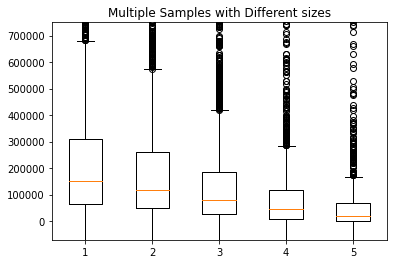

In [0]:
x = data1.TW1
y = data1.R1SHLT
per =  np.percentile(x, np.arange(0, 100, 10))
per = np.append(per,x.max())
data = []
# for i in range(10):
#   data.append(y[(x>per[i]) & (x<=per[i+1])])
for i in range(5):
  data.append(x[y==i+1])
fig7, ax7 = plt.subplots()

ax7.set_title('Total wealth vs self-reported health')
ax7.boxplot(data)

plt.ylim(-71000,750000)

plt.show()

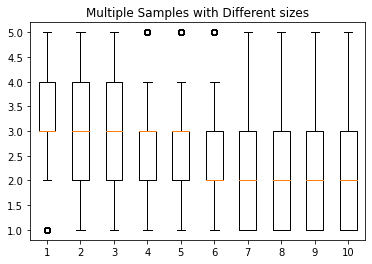

In [0]:
x = data1.TW1
y = data1.R1SHLT
per =  np.percentile(x, np.arange(0, 100, 10))
per = np.append(per,x.max())
data = []
for i in range(10):
  data.append(y[(x>per[i]) & (x<=per[i+1])])
fig7, ax7 = plt.subplots()

ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)


plt.show()

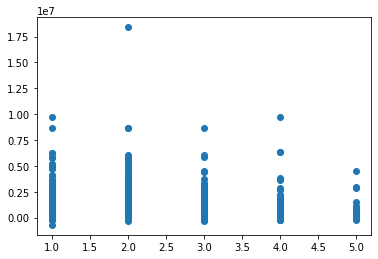

In [0]:
plt.scatter(y,x)

# 4. Data preprocessing

In [0]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data1['R1IWSTAT'] = LE.fit_transform(data1['R1IWSTAT'])

In [0]:
data1['R1MSTAT'] = 1*data1['R1MSTAT'].isin([1,3])
data1['RAGENDER'] = 1*(data1['RAGENDER']==2)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(data1[['R1SHLT','R1AGEY_B','RAGENDER','RAEDYRS', 'R1MSTAT', 'R1IWSTAT','H1ITOT','NHFW1','TW1','NHW1']])
# d1_scaled = scaler.transform(data1[['R1SHLT','R1AGEY_B','RAGENDER','RAEDYRS', 'R1MSTAT', 'R1IWSTAT','H1ITOT','NHFW1','TW1','NHW1']])

scaler.fit(data1[['R1SHLT','R1AGEY_B','RAGENDER','RAEDYRS', 'R1MSTAT','H1ITOT','TW1']])
d1_scaled = scaler.transform(data1[['R1SHLT','R1AGEY_B','RAGENDER','RAEDYRS', 'R1MSTAT','H1ITOT','TW1']])

## 4.1 KMeans clustering - finding elbow

In [0]:
from sklearn.cluster import KMeans

In [0]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(d1_scaled).score(d1_scaled) for i in range(len(km))]

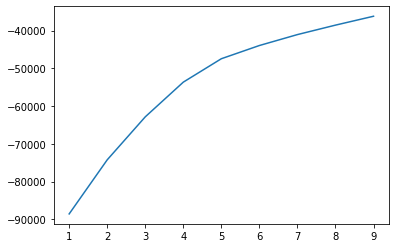

In [0]:
plt.plot(Ks, score)

## 4.2 KMeans - dividing data into 5 clusters

In [0]:
num_clusters = 5
cluster = KMeans(n_clusters = num_clusters)
idx = cluster.fit_predict(d1_scaled)

In [0]:
c = pd.DataFrame(scaler.inverse_transform(cluster.cluster_centers_))
c.columns = ["Health", "Age","Gender","Year Edu", "Married", "Income", "Total Wealth"] 
round(c, 1)

,Health,Age,Gender,Year Edu,Married,Income,Total Wealth
0,1.9,55.5,0.5,14.5,0.9,222816.2,2448150.0
1,2.9,55.6,0.7,11.9,0.0,21582.7,77622.3
2,3.9,58.1,0.4,8.2,1.0,25097.2,80030.2
3,2.2,52.3,1.0,12.8,1.0,53247.0,197059.4
4,2.1,56.6,0.0,13.5,1.0,57481.0,219072.3


In [0]:
cluster_map = pd.concat([data1.HHIDPN, pd.Series(idx)], axis=1).rename(columns={0:'idx'})

In [0]:
cluster_map.idx.value_counts()

3    4186
4    3544
1    2342
2    2283
0     296
Name: idx, dtype: int64

In [0]:
data1[['R1SHLT','R1AGEY_B','RAGENDER','RAEDYRS', 'R1MSTAT', 'R1IWSTAT','H1ITOT','NHFW1','TW1','NHW1']].groupby("R1SHLT").mean()

,R1AGEY_B,RAGENDER,RAEDYRS,R1MSTAT,R1IWSTAT,H1ITOT,NHFW1,TW1,NHW1
R1SHLT,,,,,,,,,
1.0,54.264339,0.545422,13.220164,0.846455,0.0,65056.657998,71314.027306,311231.421106,226778.398839
2.0,54.977305,0.546969,12.837690,0.840563,0.0,55291.214881,68865.904120,263837.052067,193860.915037
3.0,55.534989,0.517777,11.692720,0.819131,0.0,42506.883747,37414.388227,171819.704319,117677.086462
4.0,56.108467,0.552297,10.566132,0.739347,0.0,29474.258993,27531.102042,120569.038860,78318.359946
5.0,56.441700,0.509881,9.597826,0.671937,0.0,21069.083004,11196.053412,70355.628405,39144.129898


In [0]:
var = df[['HHIDPN','RAGENDER']]
var1 = df[['HHIDPN','RAGENDER']]
var2 = df[['HHIDPN','RAGENDER']]
var4 = df[['HHIDPN','RAGENDER']]
var6 = df[['HHIDPN','RAGENDER']]
for i in range(13):
  i=i+1
  var['H' + str(i) + 'ITOT'] = df['H' + str(i) + 'ITOT']
  var1['R' + str(i) + 'SHLT'] = df['R' + str(i) + 'SHLT']
  var2['R' + str(i) + 'AGEY_B'] = df['R' + str(i) + 'AGEY_B']
  var4['TW' + str(i)] =  df['TW' + str(i)]
  var6['R' + str(i) + 'MSTAT'] = df['R' + str(i) + 'MSTAT'] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [0]:
data = df[['HHIDPN','RAEDYRS','RAEDYRS']]

In [0]:
data2 = var.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='income_var', value_name='income')
data2 = pd.concat([data2, var1.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='health_var', value_name='health')], axis=1)
data2 = pd.concat([data2, var2.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='age_var', value_name='age')], axis=1)
data2 = pd.concat([data2, var4.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='tw_var', value_name='tw')], axis=1)  
data2 = pd.concat([data2, var6.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='married_var', value_name='married')], axis=1)
data2 = data2.iloc[:,~data2.columns.duplicated()]
data = pd.merge(data, data2, on='HHIDPN')

In [0]:
data = data[data.income.notnull()].reset_index(drop=True)

In [0]:
data['married'] = 1*data['married'].isin([1,3])
data['RAGENDER'] = 1*(data['RAGENDER']==2)

In [0]:
data['wave'] = data.health_var.str[1:3].map(lambda x: x.rstrip('S')).astype(int)

In [0]:
data = data[['HHIDPN', 'RAEDYRS',	'RAGENDER',	'income',	'health',	'age',	'tw',	'married','wave']]

In [0]:
data = data.iloc[:,~data.columns.duplicated()]

In [0]:
data = pd.merge(data, cluster_map, on="HHIDPN").drop(columns='HHIDPN')

In [0]:
data.idx.value_counts()

3    41872
4    32181
1    19931
2    17150
0     2875
Name: idx, dtype: int64

In [0]:
cluster_summary = data.groupby(['wave','idx']).agg({'RAEDYRS':['mean','count'],	\
                                                    'RAGENDER':'mean',\
                                                    'income':'mean',	\
                                                    'health':'mean',	\
                                                    'age':'mean',	\
                                                    'tw':'mean',	\
                                                    'married':'mean'})\
.rename(columns={'RAEDYRS':'years_edu','RAGENDER':'female_per', 'tw':'total_wealth', 'married':'married_per'})

In [0]:
cluster_summary['female_per'] = (cluster_summary['female_per'].round(2)*100).astype(int)
cluster_summary['health'] = (100-cluster_summary['health']*20).astype(int)
cluster_summary['total_wealth'] = ((cluster_summary['total_wealth']/1000).round(0)).astype(int)
cluster_summary['income'] = ((cluster_summary['income']/1000).round(0)).astype(int)
cluster_summary['married_per'] = (cluster_summary['married_per'].round(2)*100).astype(int)
cluster_summary['age'] = cluster_summary['age'].round(1)
cluster_summary['years_edu'] = cluster_summary['years_edu'].round(1)

In [0]:
cluster_summary = cluster_summary.reset_index()

In [0]:
cols = list(cluster_summary.columns.get_level_values(0))
cols[3] = 'count'
cluster_summary.columns = cols

In [0]:
cluster_summary['count'] = cluster_summary['count'].round(0).astype(int)

In [0]:
cluster_summary.to_csv('cluster_summary.csv')

# 5. Multi wave analysis - Predicting self-reported health with demographic variables

In [0]:
var = df[['HHIDPN','RAGENDER']]
var1 = df[['HHIDPN','RAGENDER']]
var2 = df[['HHIDPN','RAGENDER']]
var3 = df[['HHIDPN','RAGENDER']]
var4 = df[['HHIDPN','RAGENDER']]
var5 = df[['HHIDPN','RAGENDER']]
var6 = df[['HHIDPN','RAGENDER']]
var7 = df[['HHIDPN','RAGENDER']]
#Don't use R1OOPMD later
var7['R1OOPMD'] = df['R2OOPMD']
###
var8 = df[['HHIDPN','RAGENDER']]
for i in range(13):
  i=i+1
  var['H' + str(i) + 'ITOT'] = df['H' + str(i) + 'ITOT']
  var1['R' + str(i) + 'SHLT'] = df['R' + str(i) + 'SHLT']
  var2['R' + str(i) + 'AGEY_B'] = df['R' + str(i) + 'AGEY_B']
  var3['NHFW' + str(i)] = df['NHFW' + str(i)]
  var4['TW' + str(i)] =  df['TW' + str(i)]
  var5['NHFW' + str(i)] = df['NHFW' + str(i)]
  var6['R' + str(i) + 'MSTAT'] = df['R' + str(i) + 'MSTAT'] 
  if i>1: 
    var7['R' + str(i) + 'OOPMD'] = df['R' + str(i) + 'OOPMD']  
  var8['H' + str(i) + 'ASTCK'] = df['H' + str(i) + 'ASTCK']  

In [0]:
data = df[['HHIDPN','RAEDYRS']]

In [0]:
data2 = var.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='income_var', value_name='income')
data2 = pd.concat([data2, var1.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='health_var', value_name='health')], axis=1)
data2 = pd.concat([data2, var2.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='age_var', value_name='age')], axis=1)
data2 = pd.concat([data2, var3.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='nhfw_var', value_name='nhfw')], axis=1)  
data2 = pd.concat([data2, var4.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='tw_var', value_name='tw')], axis=1)  
data2 = pd.concat([data2, var5.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='nhw_var', value_name='nhw')], axis=1)  
data2 = pd.concat([data2, var6.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='married_var', value_name='married')], axis=1)
data2 = pd.concat([data2, var7.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='medexp_var', value_name='medexp')], axis=1)  
data2 = pd.concat([data2, var8.melt(id_vars = ['HHIDPN','RAGENDER'], var_name='stock_var', value_name='stock')], axis=1)
data2 = data2.iloc[:,~data2.columns.duplicated()]
data = pd.merge(data, data2, on='HHIDPN')

In [0]:
data = data[data.income.notnull()].reset_index(drop=True)

In [0]:
data_lag = data.groupby(['HHIDPN','RAEDYRS','RAGENDER']).shift(periods=1)
data_lag = data_lag.add_suffix('_prev')
data = pd.concat([data, data_lag], axis=1)

In [0]:
data = data[data.age.notnull() & data.age_prev.notnull() & data.income_prev.notnull() & data.health.notnull() & data.health_prev.notnull() & data.married.notnull() & data.married_prev.notnull()].reset_index(drop=True)

In [0]:
idvs = [i for i in data.dtypes.index[data.dtypes == float] if i!="health"]

In [0]:
data_idvs = data.iloc[:,data.columns.isin(idvs)]
data_idvs.isnull().sum() * 100 / len(data_idvs)

RAEDYRS         0.0
RAGENDER        0.0
income          0.0
age             0.0
nhfw            0.0
tw              0.0
nhw             0.0
married         0.0
income_prev     0.0
health_prev     0.0
age_prev        0.0
nhfw_prev       0.0
tw_prev         0.0
nhw_prev        0.0
married_prev    0.0
dtype: float64

## 5.1 Training & Validation - CART model

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
data['dv'] = data.health>3

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,data.columns.isin(idvs)], data.dv, test_size=0.33, random_state=42)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
cross_val_score(clf, X_train, y_train, cv=5)

array([0.82640587, 0.82330402, 0.8225677 , 0.82176483, 0.82435589])

In [0]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
from sklearn.metrics import roc_auc_score
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print(roc_auc_score(y_train, y_pred_train))
print(roc_auc_score(y_test, y_pred_test))

0.7755287240330168
0.7740642397644589


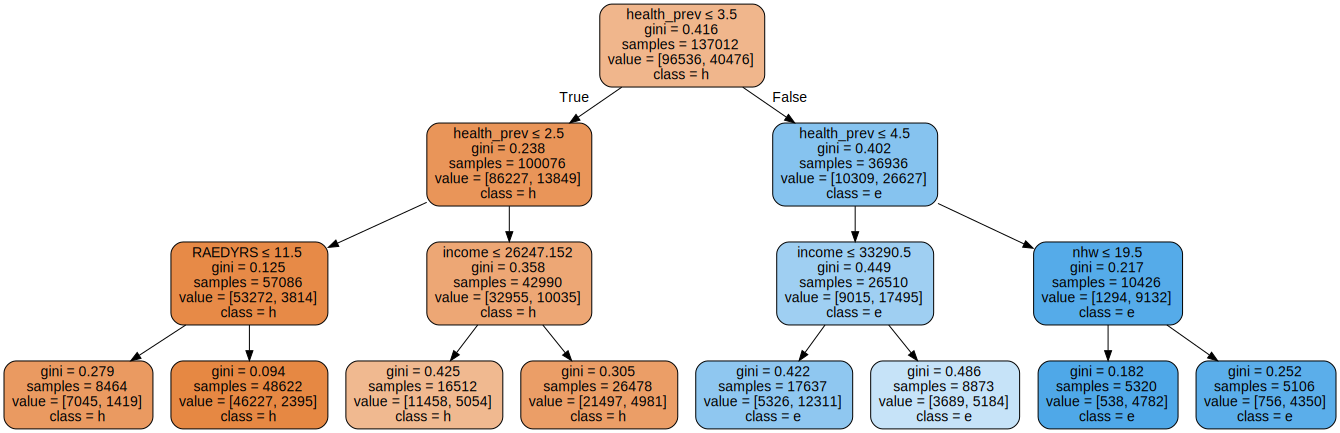

In [0]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=data.iloc[:,data.columns.isin(idvs)].columns,  
                      class_names="health",  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# 6. PSID + HRS data

In [0]:
psid = psid.drop(columns='state')
psid = psid[psid.waveyear>1994]
psid['wave'] = 4+(psid.waveyear-1999)/2

In [0]:
hrs = data[['age','health','stock','medexp','nhfw','income','health_var']]
hrs['house'] = data['tw'] - data['nhw']
hrs['wave'] = hrs.health_var.str[1].astype(int)
hrs = hrs[hrs.wave>3].rename(columns={"medexp":"medicaldebt", "nhfw":"financialwealth", 'income':'labor'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
ds = pd.concat([psid[['age','health','stock','medicaldebt','house','financialwealth','labor','wave']], \
                hrs[['age','health','stock','medicaldebt','house','financialwealth','labor','wave']]], axis=0)

In [0]:
ds.isnull().sum() * 100 / len(data_idvs)

age                0.00000
health             0.03961
stock              0.00000
medicaldebt        0.00000
house              0.00000
financialwealth    0.00000
labor              0.00000
wave               0.00000
dtype: float64

In [0]:
ds['dv'] = ds.health>3

In [0]:
ds = ds[ds.dv.notnull()]

In [0]:
np.corrcoef(ds.dv, ds.age)

array([[1.        , 0.20055489],
       [0.20055489, 1.        ]])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds[ds.wave==4][['age','dv','stock','medicaldebt','house','financialwealth','labor']])
ds_scaled = scaler.transform(ds[ds.wave==4][['age','dv','stock','medicaldebt','house','financialwealth','labor']])

In [0]:
from sklearn.cluster import KMeans

In [0]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(ds_scaled).score(ds_scaled) for i in range(len(km))]

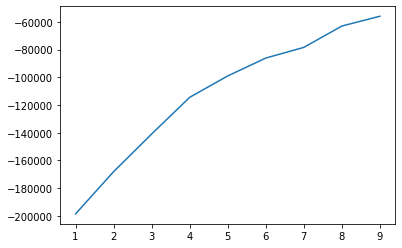

In [0]:
plt.plot(Ks, score)

In [0]:
num_clusters = 3
cluster = KMeans(n_clusters = num_clusters)
idx = cluster.fit_predict(ds_scaled)

In [0]:
c = pd.DataFrame(cluster.cluster_centers_)
c.columns = ['age','dv','stock','medicaldebt','house','financialwealth','labor']
round(c, 1)

,age,dv,stock,medicaldebt,house,financialwealth,labor
0,-0.0,-0.6,0.0,-0.3,0.1,0.0,0.1
1,0.4,1.6,-0.1,-0.3,-0.1,-0.1,-0.2
2,-0.7,-0.2,-0.1,2.9,-0.2,-0.0,-0.2


In [0]:
ds[ds.wave==4][['age','dv','stock','medicaldebt','house','financialwealth','labor']].groupby("R1SHLT").mean()

,R1AGEY_B,RAGENDER,RAEDYRS,R1MSTAT,R1IWSTAT,H1ITOT,NHFW1,TW1,NHW1
R1SHLT,,,,,,,,,
1.0,54.264339,1.545422,13.220164,1.764874,1,65056.657998,71314.027306,311231.421106,226778.398839
2.0,54.977305,1.546969,12.837690,1.819018,1,55291.214881,68865.904120,263837.052067,193860.915037
3.0,55.534989,1.517777,11.692720,1.939616,1,42506.883747,37414.388227,171819.704319,117677.086462
4.0,56.108467,1.552297,10.566132,2.329828,1,29474.258993,27531.102042,120569.038860,78318.359946
5.0,56.441700,1.509881,9.597826,2.586957,1,21069.083004,11196.053412,70355.628405,39144.129898
